In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as sk
import random
import sys
import keras.preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 전처리

min_value = np.min(X_train)
max_value = np.max(X_train)

X_train = (X_train - min_value) / (max_value - min_value)

min_valuey = np.min(y_train)
max_valuey= np.max(y_train)

X_train = (y_train - min_valuey) / (max_valuey - min_value)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
# 모델 생성
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3),strides=(1,1),padding='Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 16, kernel_size=(3,3),strides=(1,1),padding='Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 8, kernel_size=(3,3),strides=(1,1),padding='Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# 컴파일
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['mae'])

In [ ]:
# 학습
hist = model.fit(X_train,y_train,epochs = 5 , batch_size=50,verbose=2,validation_split=0.1)

Epoch 1/5
1080/1080 - 88s - loss: 0.4013 - mae: 0.0376 - val_loss: 0.0828 - val_mae: 0.0074 - 88s/epoch - 82ms/step
Epoch 2/5
1080/1080 - 81s - loss: 0.1213 - mae: 0.0114 - val_loss: 0.0682 - val_mae: 0.0052 - 81s/epoch - 75ms/step
Epoch 3/5
1080/1080 - 82s - loss: 0.0773 - mae: 0.0071 - val_loss: 0.0588 - val_mae: 0.0045 - 82s/epoch - 76ms/step
Epoch 4/5
1080/1080 - 80s - loss: 0.0589 - mae: 0.0055 - val_loss: 0.0569 - val_mae: 0.0040 - 80s/epoch - 74ms/step
Epoch 5/5
1080/1080 - 79s - loss: 0.0460 - mae: 0.0043 - val_loss: 0.0415 - val_mae: 0.0027 - 79s/epoch - 74ms/step


In [ ]:
locc,acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0383 - mae: 0.0030


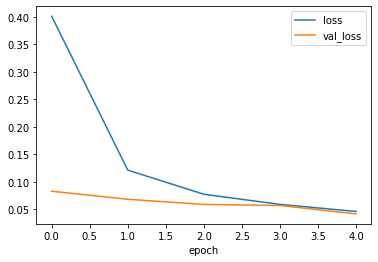

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib import cm
predict = model.predict(X_test)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
predict_list = []
for i in predict:
  idx = max(i)
  predict_list.append(list(i).index(idx))

cm = confusion_matrix(y_test, predict_list)
print(cm)

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    2    0    0    0    0    0    1    0]
 [   5    2 1017    0    2    0    0    5    1    0]
 [   1    1    7  984    0    5    0    3    7    2]
 [   0    0    0    0  976    0    1    1    2    2]
 [   2    1    1    4    0  870    8    1    2    3]
 [  13    4    0    0    1    0  940    0    0    0]
 [   0    1   10    0    3    0    0 1011    0    3]
 [   4    0    5    0    3    0    0    1  959    2]
 [   2    1    0    1    5    2    0    3    7  988]]


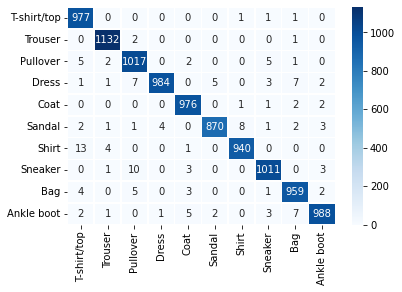

In [ ]:
import seaborn as sns
df = pd.DataFrame(cm,index=class_names, columns=class_names)
sns.heatmap(df, annot=True,fmt='d',cbar=True,linewidths=0.5,cmap='Blues')